# 라이브러리 로드

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # 경고메세지 차단

%matplotlib inline

# 한글포트 설정

In [2]:
# 한글폰트를 설정

sns.set(rc = {"figure.figsize" : (15,8)})
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rc("font", family="Noto Sans KR") # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정

<AxesSubplot:title={'center':'한글폰트'}>

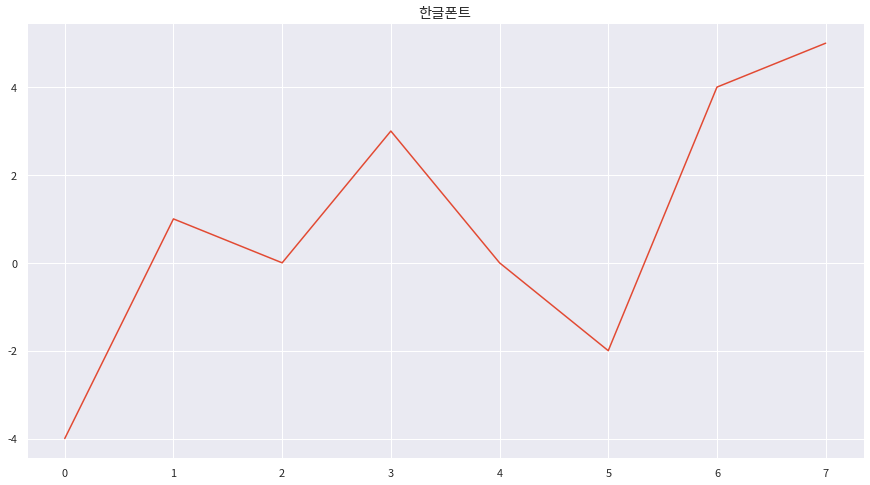

In [3]:
pd.Series([-4, 1 ,0, 3, 0, -2, 4, 5]).plot(title="한글폰트")

# 데이터 불러오기

In [4]:
ls data

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 5248-6C28

 C:\Users\user\Documents\GitHub\talmo-TT\Inflearn\data 디렉터리

2022-03-30  오후 06:20    <DIR>          .
2022-03-30  오후 06:20    <DIR>          ..
2020-05-14  오전 04:47            57,732 seoul_municipalities_geo_simple.json
2020-05-14  오전 04:49       264,920,940 상가업소정보.csv
2020-05-14  오전 04:47             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2020-05-14  오전 04:47         3,788,824 전국도시공원표준데이터.csv
2020-05-14  오전 04:47           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
               5개 파일         268,932,169 바이트
               2개 디렉터리  764,613,640,192 바이트 남음


In [5]:
df = pd.read_csv("data/상가업소정보.csv", sep="|")

# FileNotFoundError 파일을 못찾은 것
# ParserError 파일을 가져왔지만 파일을 열때 구분자가 다름.

df.shape
df["상권업종대분류명"].unique()
df_seoul_academy = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "학문/교육")].copy()
academy_group = df_seoul_academy.groupby(["시군구명", "상권업종소분류명"])["상호명"].count()
academy_count = df_seoul_academy["상권업종소분류명"].value_counts()
academy_count_1000 = academy_count[academy_count > 1000]
df_seoul_academy_selected = df_seoul_academy[df_seoul_academy["상권업종소분류명"].isin(academy_count_1000.index)]

In [6]:
# 모든 칼럼이 보이도록 지정
pd.options.display.max_columns = 50

In [7]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


# 데이터 확인하기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

## 결측치 확인하기

In [9]:
n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

<AxesSubplot:>

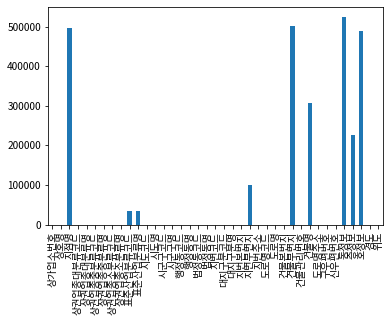

In [10]:
# 결측치 시각화
n.plot.bar()

## 결측치 그래프 그리기

<AxesSubplot:>

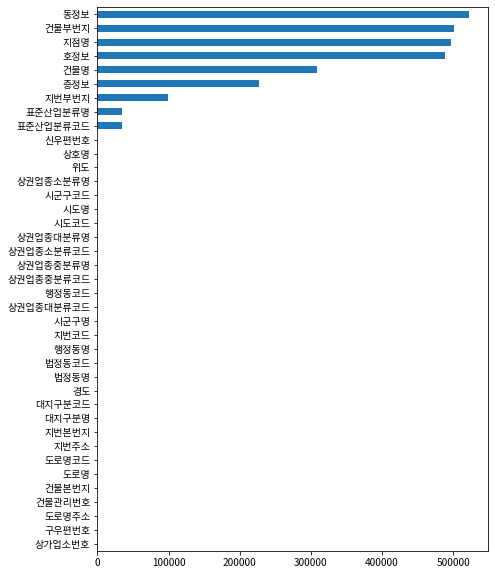

In [11]:
# 값을 정렬해서 결측치가 많은 값이 위에 나오도록 그린다.
# n.plot.barh(figsize=(7,10))

# 값을 기준 정렬
n.sort_values().plot.barh(figsize=(7,10))

## missingno 로 결측치 시각화하기

In [12]:
import missingno as msno

### `msno.matrix`

<AxesSubplot:>

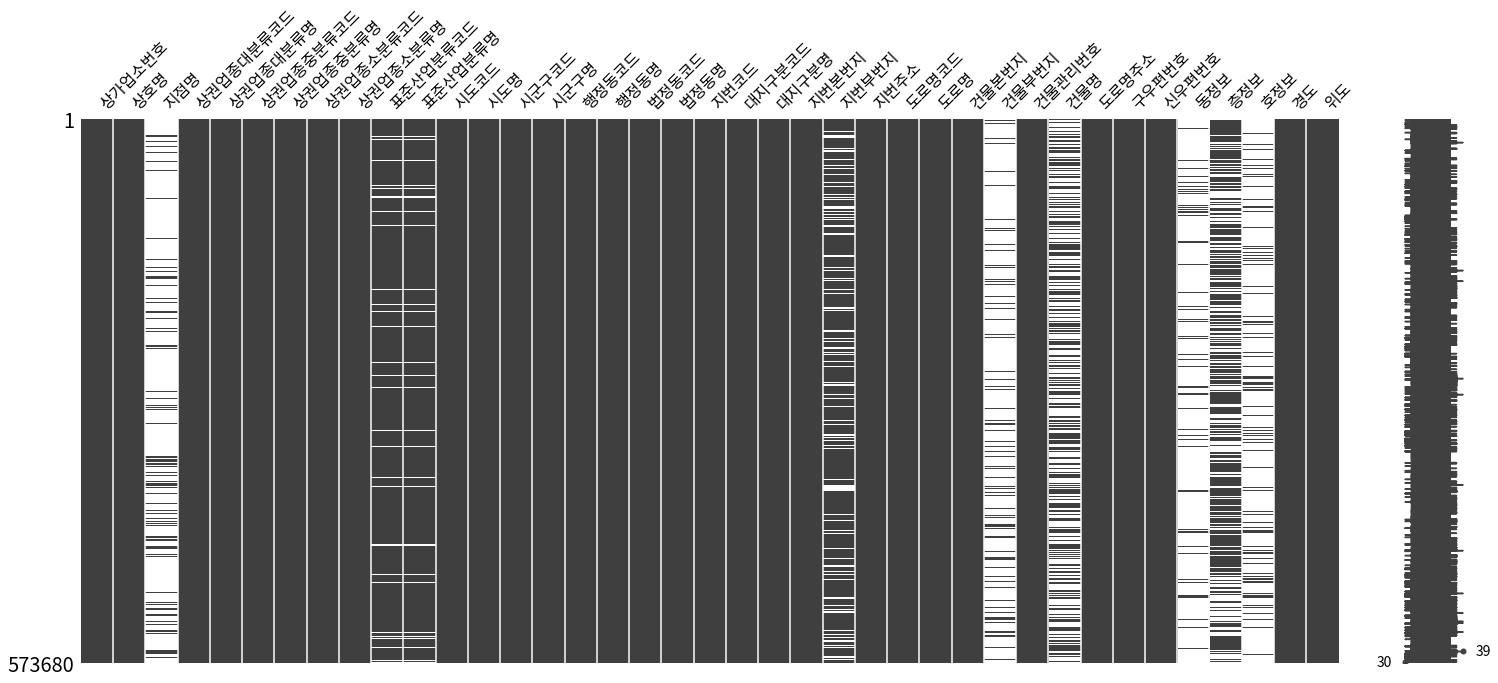

In [13]:
msno.matrix(df)

### `msno.heatmap(df)`으로 시각화

<AxesSubplot:>

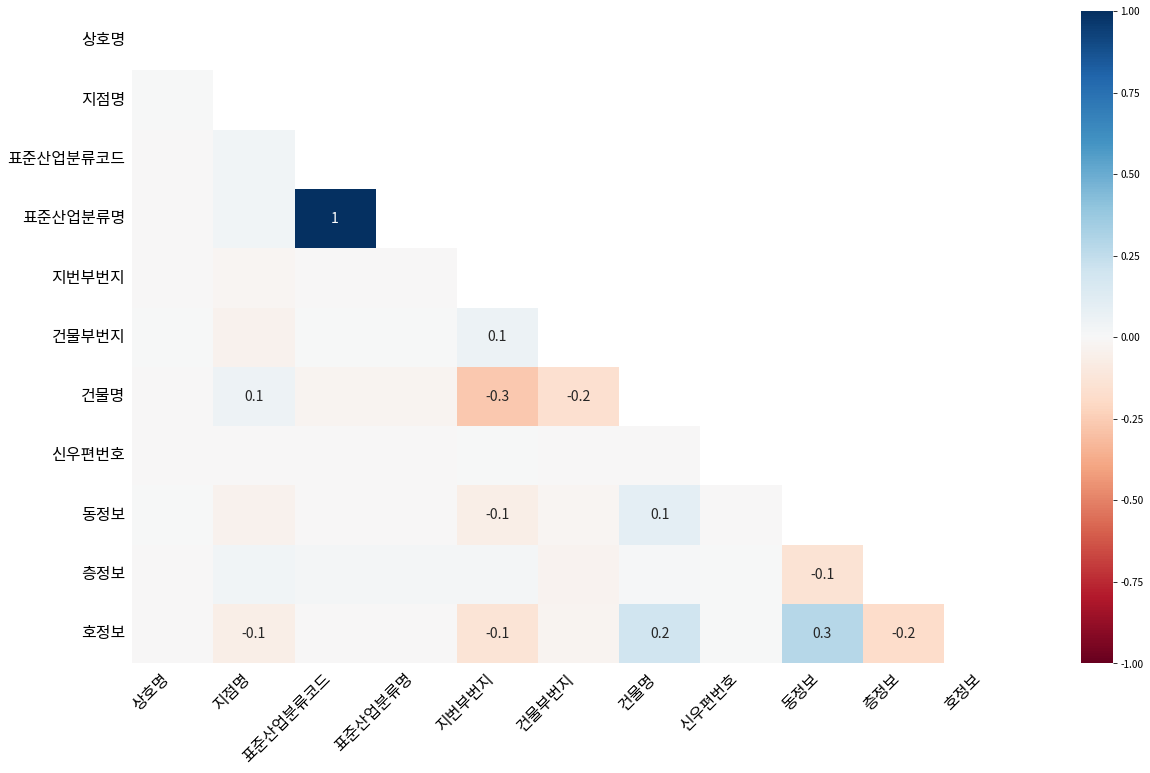

In [14]:
msno.heatmap(df)

### `msno.dendrogram()` 으로 시각화

<AxesSubplot:>

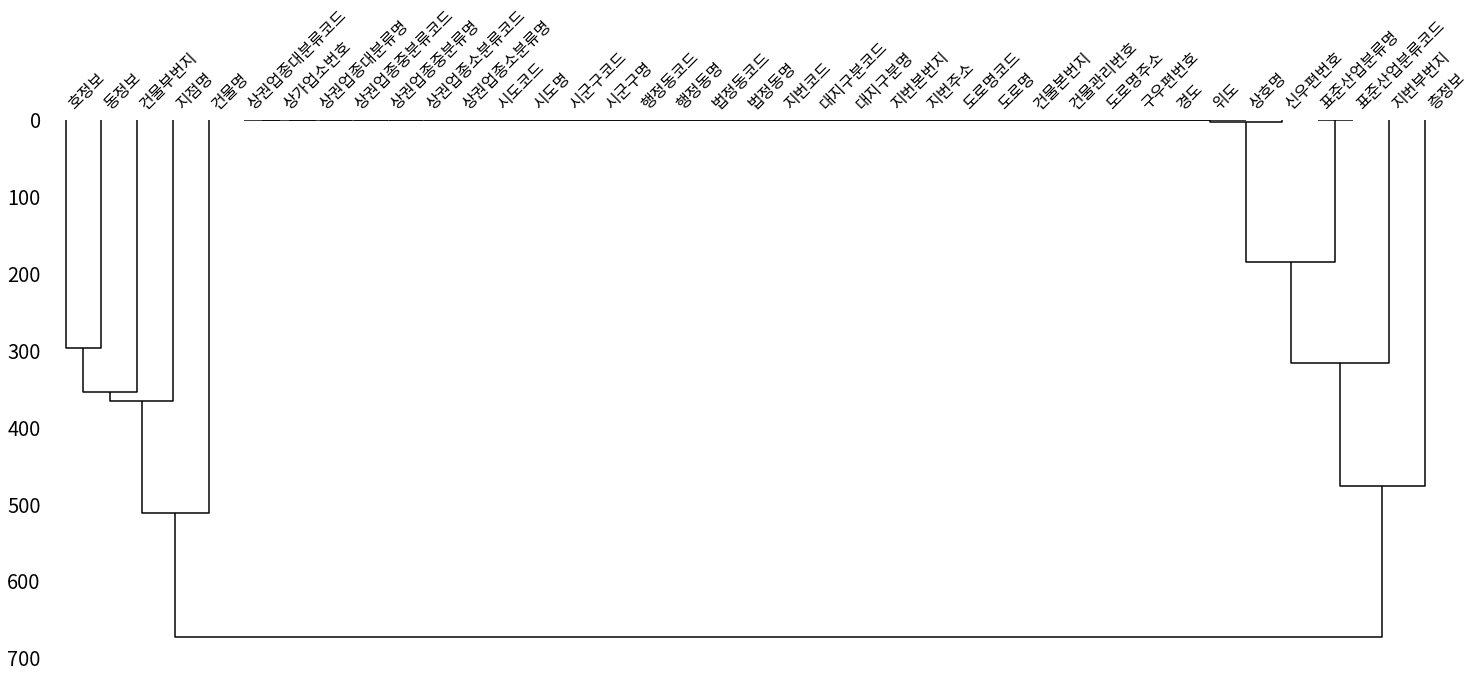

In [15]:
msno.dendrogram(df)

# 사용하지 않는 칼럼 제거하기

## 결측치가 너무 많은 데이터 제거

In [16]:
n.sort_values(ascending=False).head(15)

# 결측치가 너무 많은 데이터 인덱스에 담기
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [17]:
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

## 중복되는 칼럼 제거

In [19]:
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

## `.str.contains()` 로 " " 이 포함된 데이터 제거

In [20]:
# 모든 칼럼중에 코드, 번호는 제외하고 사용한다.
print(cols.str.contains("코드|번호"))
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

[ True False  True False  True False  True False  True False  True False
  True False  True False  True  True False False False  True False False
  True False  True  True False False]


Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [21]:
print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


# 행, 열을 기준으로 값을 가져오기

## 열 기준

In [23]:
# 1개 칼럼 가져올 때
df[["상호명"]].head()

,상호명
0,와라와라호프
1,커피빈코리아선릉로93길점
2,프로포즈
3,싱싱커피&토스트
4,가락사우나내스낵


In [24]:
# 2개 칼럼 이상 가져올 때

In [25]:
df[["상호명", "도로명주소"]]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71
...,...,...
573675,비파티세리공덕,서울특별시 마포구 마포대로14길 4
573676,앤탑PC방,서울특별시 성동구 성수일로8길 37
573677,오즈아레나PC방,서울특별시 강남구 강남대로 492
573678,파인트리네일,서울특별시 영등포구 국제금융로 10


## 행 기준

In [26]:
df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                    127.061026
위도                     37.493922
Name: 0, dtype: object

In [27]:
df.loc[[0]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922


In [28]:
df.loc[[0,1,2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [29]:
df.loc[0,"상호명"]

'와라와라호프'

In [30]:
df.loc[[0,1,2], ["상호명","도로명주소"]]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6


In [31]:
#위에서 5개 왼쪽에서 5개
df.iloc[:5,:5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


In [32]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,573680.000000,573680.000000,573680.000000,573680.000000
mean,469.281810,153.912094,127.596287,36.854698
std,484.778049,276.980935,0.941262,1.081285
min,1.000000,0.000000,126.768169,35.006760
25%,109.000000,20.000000,126.968316,35.215422
50%,335.000000,50.000000,127.047672,37.511207
75%,678.000000,172.000000,128.986938,37.560362
max,9999.000000,3318.000000,129.292243,37.692398


In [33]:
df[["위도", "경도"]].describe()

,위도,경도
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


# 기술통계값 보기

In [34]:
df["위도"].count()

573680

In [35]:
df["위도"].mean()

36.854697874220655

In [36]:
df["위도"].max()

37.6923983816612

In [37]:
# 4분위 값
df["위도"].quantile(q=0.25)

35.2154217343356

In [38]:
df["위도"].median()

37.5112070048312

In [39]:
df["위도"].var()

1.1691762199812672

In [40]:
# 표준편차
import numpy as np
np.sqrt(df["위도"].var())

1.0812845231396162

In [41]:
df["위도"].std()

1.0812845231396162

## 단변량 수치형 변수 시각화

<AxesSubplot:xlabel='위도', ylabel='Density'>

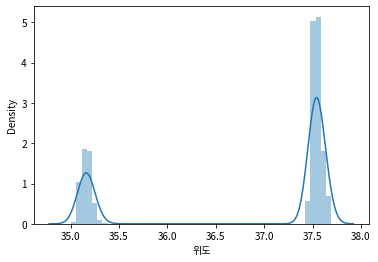

In [42]:
sns.distplot(df["위도"], bins=50)

<AxesSubplot:xlabel='위도', ylabel='Density'>

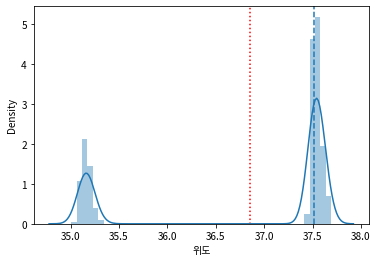

In [43]:
# 그래프에 평균, 중앙값을 표현하고, color로 선의 색상을 표현
plt.axvline(df["위도"].mean(), linestyle=":", color="r")
plt.axvline(df["위도"].median(), linestyle="--")

sns.distplot(df["위도"])

In [44]:
# 각 변수의 상관관계

corr = df.corr()
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057987,0.182678,-0.196658
건물본번지,0.057987,1.000000,0.000255,0.004606
경도,0.182678,0.000255,1.000000,-0.994711
위도,-0.196658,0.004606,-0.994711,1.000000


<AxesSubplot:>

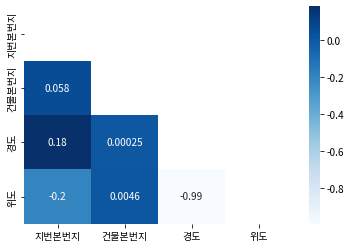

In [45]:
# 상관관계의 시각화

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap= "Blues", mask=mask)

## 이변량 수치형 변수 표현하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

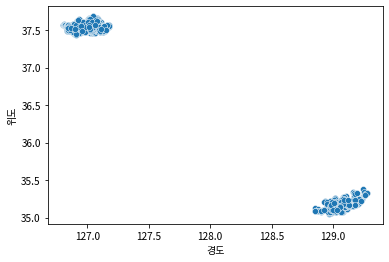

In [46]:
sns.scatterplot(data=df.sample(3000), x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

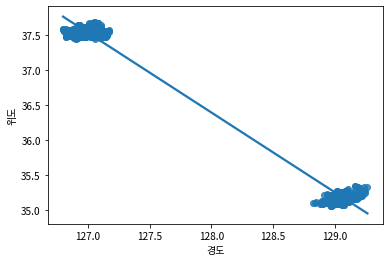

In [47]:
sns.regplot(data=df.sample(3000), x="경도", y="위도")

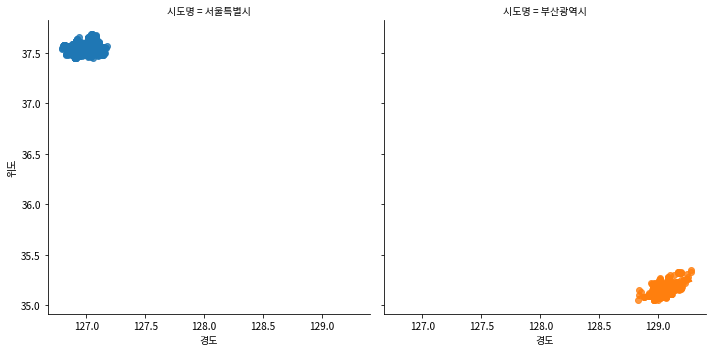

In [48]:
sns.lmplot(data=df.sample(3000), x="경도", y="위도", hue="시도명", col="시도명")
# 시도로 나누면 상관관계가 없다.

## object타입의 데이터 요약하기

In [49]:
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,629,648,2,190237,18001,190486
top,점프셈교실,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,10400,12102,572913,1058,3543,1058


In [50]:
df["상권업종대분류명"].describe()

count     573680
unique         9
top           음식
freq      185516
Name: 상권업종대분류명, dtype: object

In [51]:
df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [52]:
# unique() 의 개수
df["상권업종대분류명"].nunique()

9

In [53]:
# 최빈값
df["상권업종대분류명"].mode()

0    음식
Name: 상권업종대분류명, dtype: object

In [54]:
df["상권업종대분류명"].value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

# 인덱싱과 필터로 서브셋 만들기

## 구별 음식점 비교

In [55]:
df_food = df[df["상권업종대분류명"] == '음식'].copy()
df_food.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922


In [56]:
# ( ) & ( ) 의 형태로 여러 조건의 mask
(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "음식")

0          True
1          True
2         False
3         False
4         False
          ...  
573675    False
573676    False
573677    False
573678    False
573679    False
Length: 573680, dtype: bool

In [57]:
df_seoul_food = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "음식")].copy()
df_seoul_food.shape

(132889, 16)

In [58]:
food_gu = df_seoul_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()
food_gu.head()

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
Name: 상호명, dtype: int64

<AxesSubplot:xlabel='상권업종중분류명'>

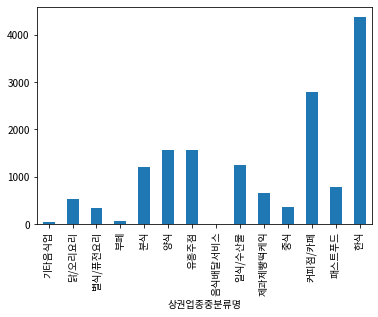

In [59]:
food_gu.unstack().loc["강남구"].plot.bar()

In [60]:
food = food_gu.reset_index()
food = food.rename(columns={"상호명" : "상호수"})
food.head()

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197


<AxesSubplot:xlabel='상권업종중분류명', ylabel='상호수'>

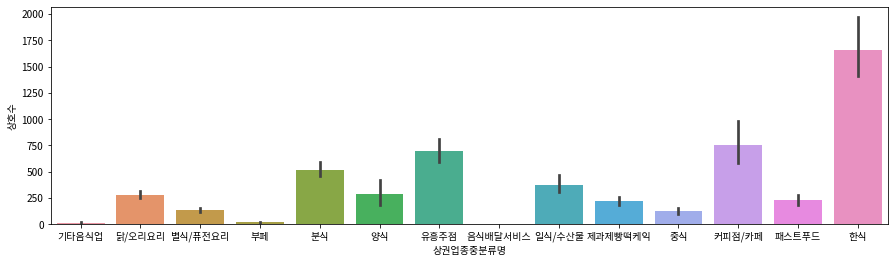

In [61]:
plt.figure(figsize=(15,4))
sns.barplot(data=food, x="상권업종중분류명", y="상호수")

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

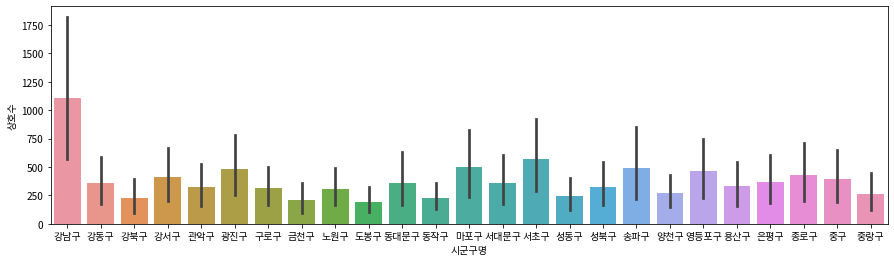

In [62]:
plt.figure(figsize=(15,4))
sns.barplot(data=food, x="시군구명", y="상호수")

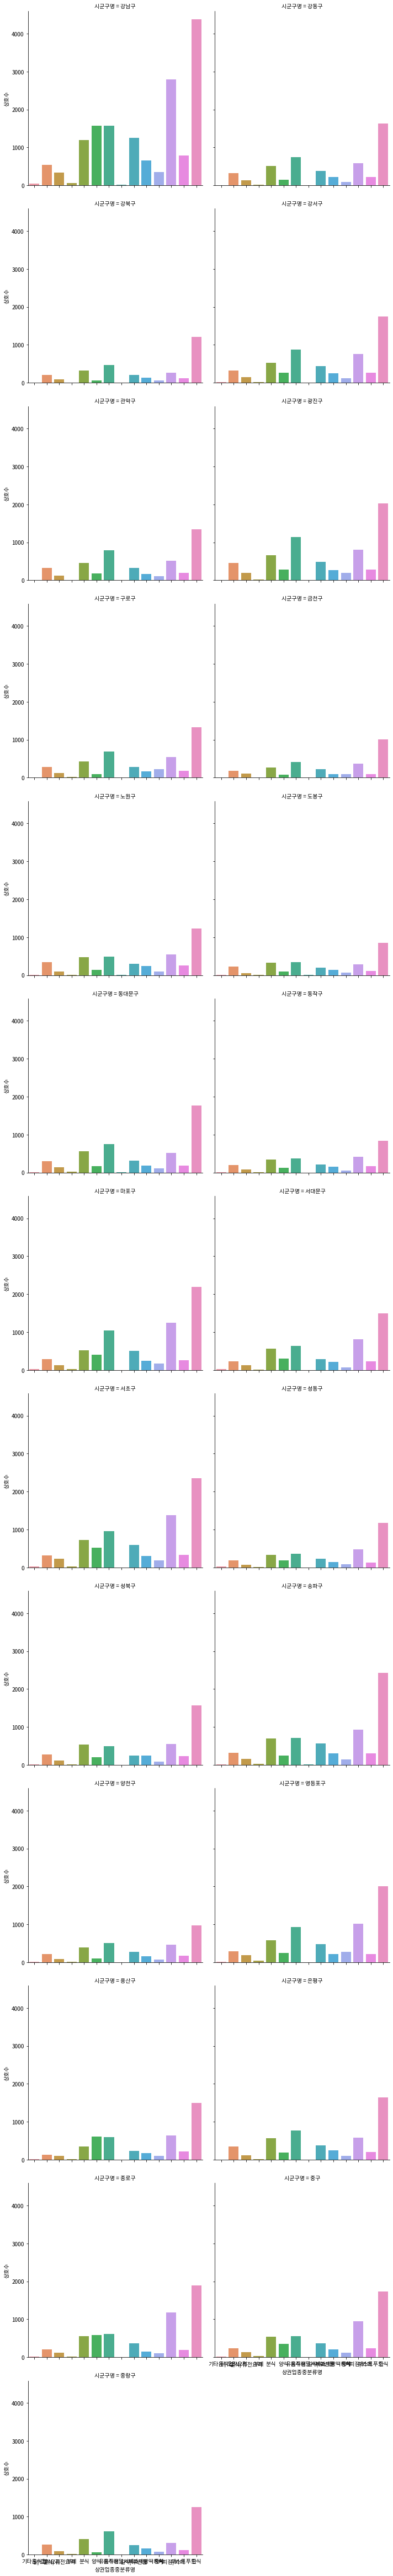

In [63]:
sns.catplot(data = food, x="상권업종중분류명", y="상호수", kind="bar", col = "시군구명", col_wrap=2)

## 구별 학원수 비교

In [2]:
df["상권업종대분류명"].unique()

NameError: name 'df' is not defined

In [68]:
df_seoul_academy = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "학문/교육")].copy()
df_seoul_academy.head(1)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
85,GIA보석교육원,학문/교육,학원-자격/국가고시,학원-보석감정,서울특별시,강남구,압구정동,신사동,대지,639,서울특별시 강남구 신사동 639-3,서울특별시 강남구 압구정로,320,서울특별시 강남구 압구정로 320,127.036437,37.528532


In [71]:
df_seoul_academy["상호명"].value_counts().head(10)

점프셈교실      1659
해법수학         57
윤선생영어교실      34
뮤엠영어         27
해법영어교실       24
눈높이          22
해동검도         22
삼성영어         21
구몬학습         20
행복한어린이집      19
Name: 상호명, dtype: int64

In [72]:
df_seoul_academy["시군구명"].value_counts()

강남구     4005
서초구     2103
양천구     1881
광진구     1848
송파구     1797
강동구     1585
노원구     1582
강서구     1498
은평구     1333
관악구     1313
성북구     1246
구로구     1140
동대문구    1051
동작구     1050
마포구     1007
영등포구     984
도봉구      931
중랑구      884
서대문구     773
성동구      742
금천구      701
종로구      638
강북구      513
용산구      491
중구       413
Name: 시군구명, dtype: int64

In [75]:
df_seoul_academy["상권업종소분류명"].value_counts().head(30)

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
학원-기타           677
태권도장            610
학습지보급           430
학원-어린이영어        319
컴퓨터학원           270
학원-스포츠/재즈댄스     269
학원-무용           220
놀이방             139
학원-주산암산부기속셈     122
유아교육기관기타        107
학원-미용           106
학원-배우/탤런트       102
합기도장             96
검도도장             95
실내놀이터-유아         84
학원-요리            78
학원-간호조무사         76
학원/국가고시          70
학원-사교춤           54
유도장              49
학원-심리변론          46
학원-국악            45
Name: 상권업종소분류명, dtype: int64

In [79]:
# 1000개 이상 데이터 추출
academy_count = df_seoul_academy["상권업종소분류명"].value_counts()
academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [84]:
# "시군구명", "상권업종소분류명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산한다.
academy_group = df_seoul_academy.groupby(["시군구명", "상권업종소분류명"])["상호명"].count()
academy_group

시군구명  상권업종소분류명   
강남구   검도도장             9
      고시원            139
      놀이방              8
      독서실            125
      서예/서화/미술       219
                    ... 
중랑구   학원-입시          172
      학원-주산암산부기속셈      7
      학원-펜글씨/한문        1
      학원/국가고시          2
      합기도장             2
Name: 상호명, Length: 1118, dtype: int64

In [87]:
t = academy_group.reset_index()
t = t.rename(columns={"상호명": "상호수"})
t

,시군구명,상권업종소분류명,상호수
0,강남구,검도도장,9
1,강남구,고시원,139
2,강남구,놀이방,8
3,강남구,독서실,125
4,강남구,서예/서화/미술,219
...,...,...,...
1113,중랑구,학원-입시,172
1114,중랑구,학원-주산암산부기속셈,7
1115,중랑구,학원-펜글씨/한문,1
1116,중랑구,학원/국가고시,2


<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

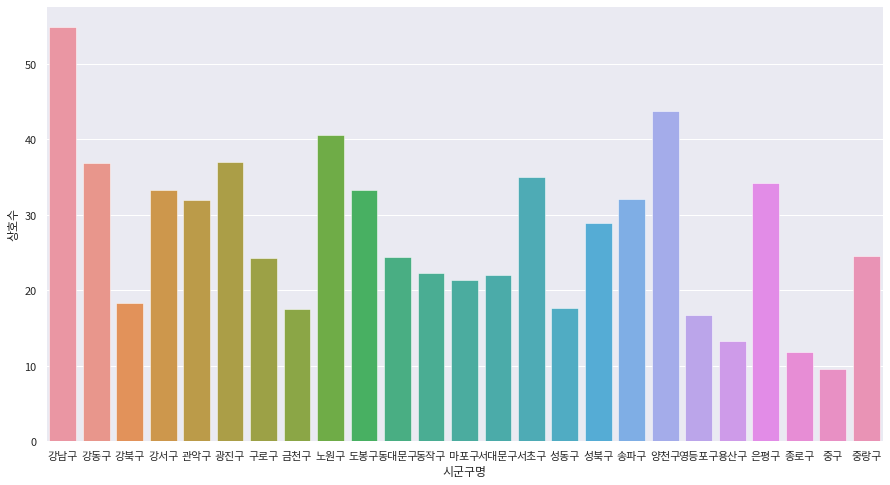

In [112]:
sns.barplot(data=t, x="시군구명", y="상호수", ci=None)

## isin 을 사용해 서브셋 만들기

In [120]:
# isin 으로 빈도수로 계산했을때 1000개 이상인 데이터만 가져와서 본다

academy_count_1000.index

Index(['학원-입시', '학원(종합)', '어린이집', '학원-외국어/어학', '피아노/바이올린/기타', '서예/서화/미술',
       '독서실', '고시원'],
      dtype='object')

In [125]:
print(df_seoul_academy.shape)
df_seoul_academy_selected = df_seoul_academy[df_seoul_academy["상권업종소분류명"].isin(academy_count_1000.index)]
df_seoul_academy_selected.shape

(31509, 16)


(26630, 16)

In [126]:
df_seoul_academy_selected["상권업종소분류명"].value_counts()

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [127]:
df_seoul_academy_selected["시군구명"].value_counts()

강남구     3410
서초구     1732
양천구     1706
광진구     1536
송파구     1484
노원구     1425
강서구     1288
강동구     1255
은평구     1162
관악구     1115
성북구     1066
구로구      987
동작구      877
동대문구     863
마포구      857
도봉구      849
영등포구     775
중랑구      745
서대문구     656
성동구      642
금천구      568
종로구      479
강북구      444
용산구      395
중구       314
Name: 시군구명, dtype: int64

In [128]:
df_seoul_academy_selected.loc[
    df_seoul_academy_selected["법정동명"] == "대치동",
    "상권업종소분류명"].value_counts()

학원-입시          831
학원-외국어/어학      281
학원(종합)         211
서예/서화/미술       113
피아노/바이올린/기타     60
독서실             42
고시원             30
어린이집            16
Name: 상권업종소분류명, dtype: int64

In [130]:
df_seoul_academy_selected.loc[
    df_seoul_academy_selected["법정동명"] == "목동",
    "상권업종소분류명"].value_counts()

학원-입시          375
학원-외국어/어학      152
학원(종합)          88
어린이집            61
피아노/바이올린/기타     41
서예/서화/미술        39
독서실             22
고시원              7
Name: 상권업종소분류명, dtype: int64

In [140]:
g = df_seoul_academy_selected.groupby(["상권업종소분류명", "시군구명"])["상호명"].count()
g.reset_index()

,상권업종소분류명,시군구명,상호명
0,고시원,강남구,139
1,고시원,강동구,62
2,고시원,강북구,11
3,고시원,강서구,32
4,고시원,관악구,83
...,...,...,...
195,학원-입시,용산구,70
196,학원-입시,은평구,337
197,학원-입시,종로구,75
198,학원-입시,중구,59


<AxesSubplot:ylabel='시군구명'>

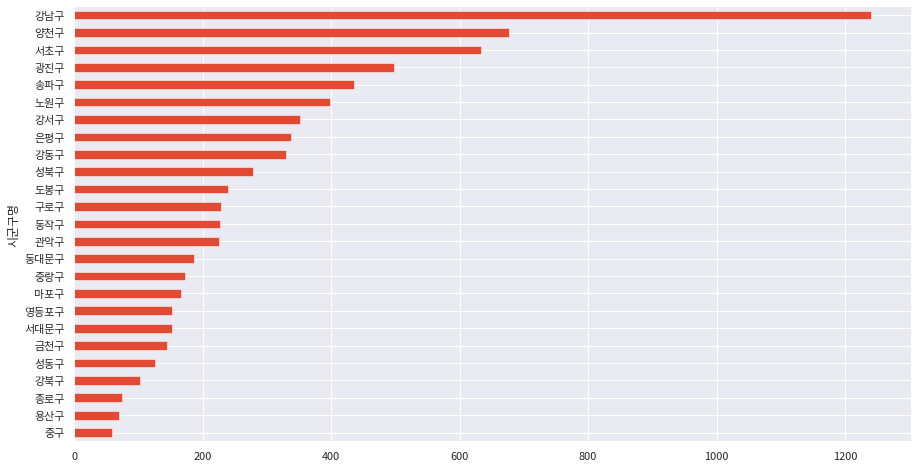

In [141]:
g.loc["학원-입시"].sort_values().plot.barh()

In [149]:
g.unstack().T.head()

상권업종소분류명,고시원,독서실,서예/서화/미술,어린이집,피아노/바이올린/기타,학원(종합),학원-외국어/어학,학원-입시
시군구명,,,,,,,,
강남구,139,125,219,189,266,564,667,1241
강동구,62,46,110,210,189,170,139,329
강북구,11,14,19,112,47,101,37,103
강서구,32,60,70,262,150,191,171,352
관악구,83,69,72,220,139,192,115,225


<AxesSubplot:ylabel='상권업종소분류명'>

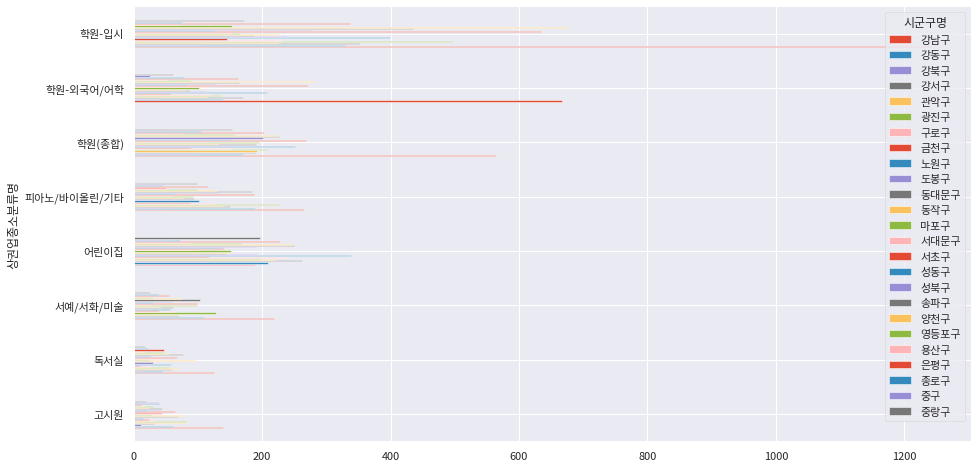

In [150]:
g.unstack().plot.barh()

<AxesSubplot:xlabel='시군구명'>

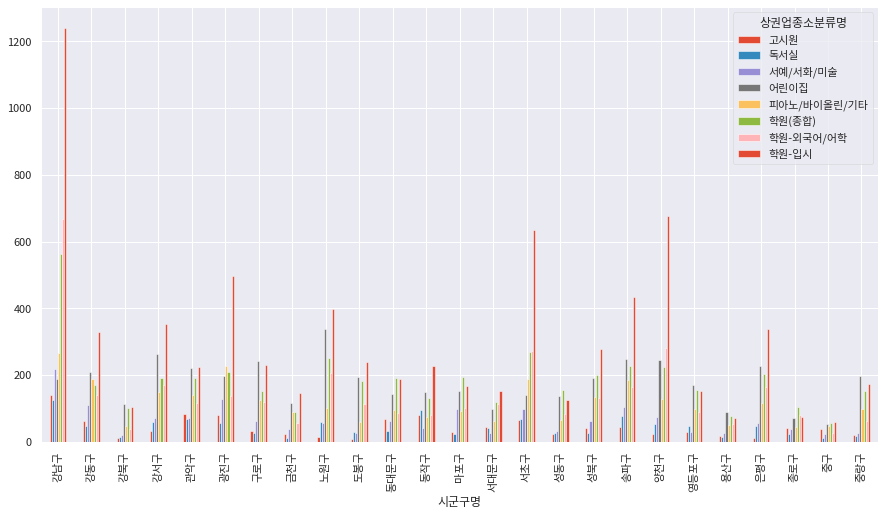

In [153]:
g.unstack().T.plot.bar()

In [154]:
g.index

MultiIndex([(  '고시원',  '강남구'),
            (  '고시원',  '강동구'),
            (  '고시원',  '강북구'),
            (  '고시원',  '강서구'),
            (  '고시원',  '관악구'),
            (  '고시원',  '광진구'),
            (  '고시원',  '구로구'),
            (  '고시원',  '금천구'),
            (  '고시원',  '노원구'),
            (  '고시원',  '도봉구'),
            ...
            ('학원-입시',  '성동구'),
            ('학원-입시',  '성북구'),
            ('학원-입시',  '송파구'),
            ('학원-입시',  '양천구'),
            ('학원-입시', '영등포구'),
            ('학원-입시',  '용산구'),
            ('학원-입시',  '은평구'),
            ('학원-입시',  '종로구'),
            ('학원-입시',   '중구'),
            ('학원-입시',  '중랑구')],
           names=['상권업종소분류명', '시군구명'], length=200)

In [157]:
t = g.reset_index()
t = t.rename(columns={"상호명": "상호수"})
t

,상권업종소분류명,시군구명,상호수
0,고시원,강남구,139
1,고시원,강동구,62
2,고시원,강북구,11
3,고시원,강서구,32
4,고시원,관악구,83
...,...,...,...
195,학원-입시,용산구,70
196,학원-입시,은평구,337
197,학원-입시,종로구,75
198,학원-입시,중구,59


# 같은 그래프를 seaborn으로 그리기

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

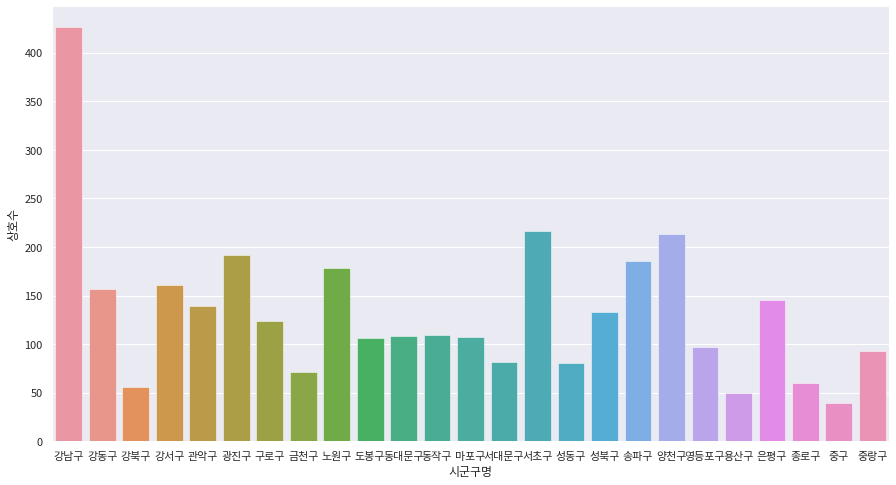

In [159]:
sns.barplot(data=t, x="시군구명", y="상호수", ci=None)

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

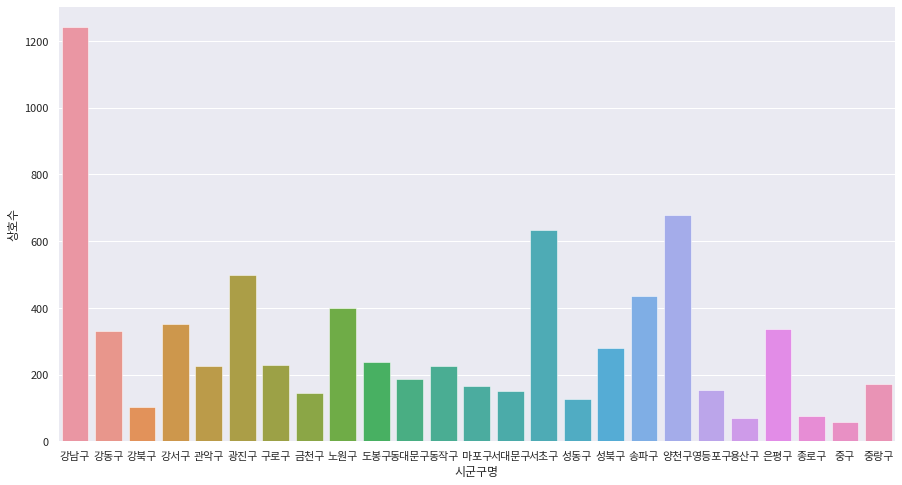

In [163]:
academy_sub = t[t["상권업종소분류명"] == "학원-입시"].copy()
# print(academy_sub.shape)
# academy_sub

sns.barplot(data=academy_sub, x="시군구명", y="상호수")

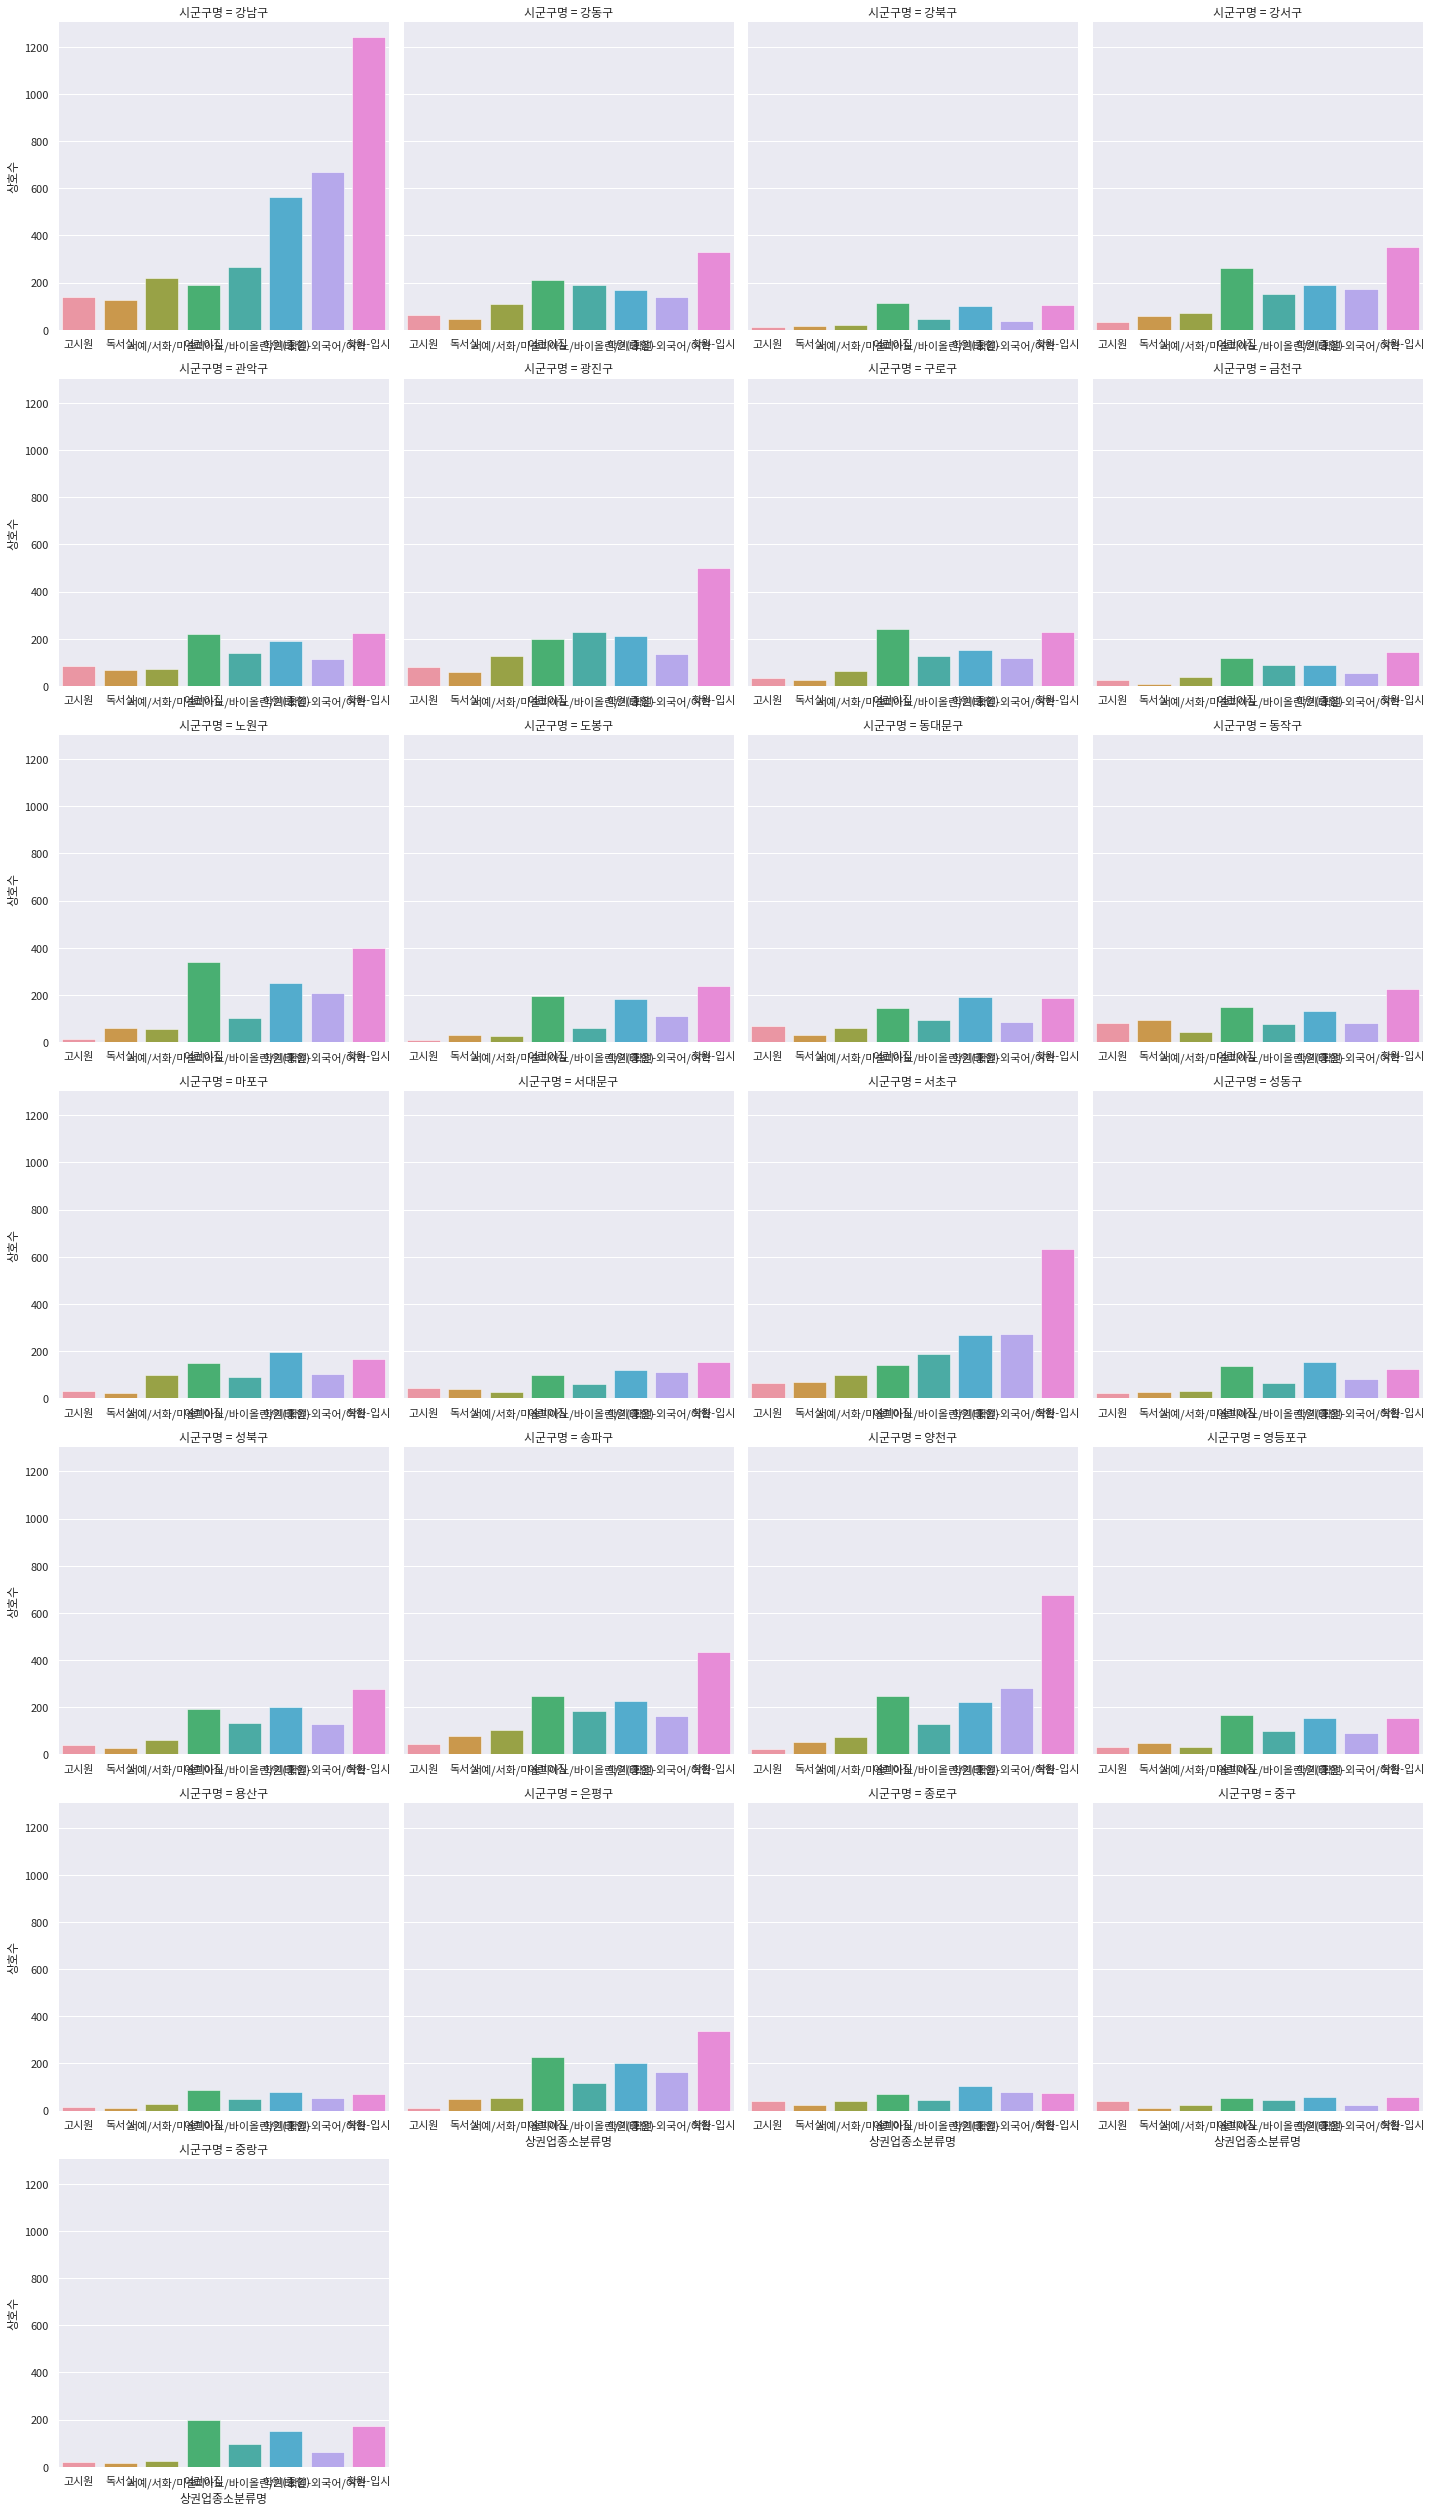

In [168]:
# catplot 을 통해 서브플롯 그리기
sns.catplot(data=t, x="상권업종소분류명", y="상호수",
            kind="bar", col="시군구명", col_wrap=4,
           sharex=False)

<AxesSubplot:xlabel='경도', ylabel='위도'>

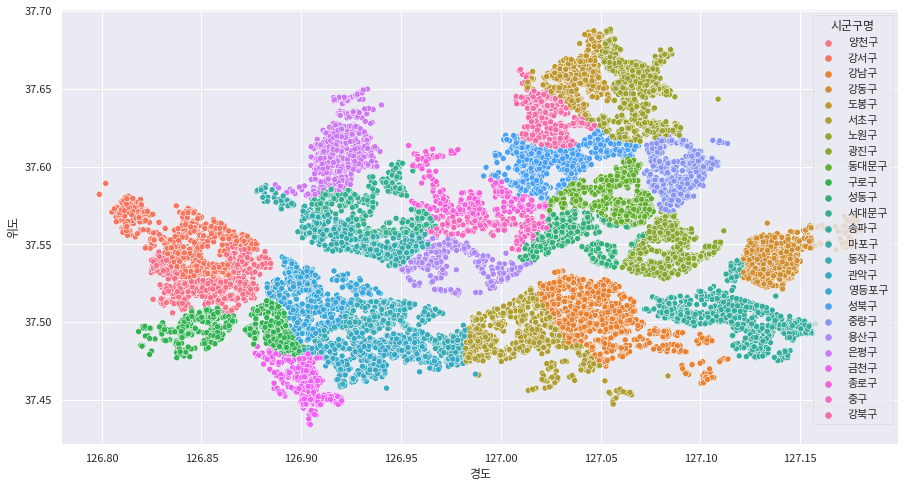

In [16]:
## 경도와 위도를 scatterplot() 으로 그리기
sns.scatterplot(data=df_seoul_academy_selected, x="경도", y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

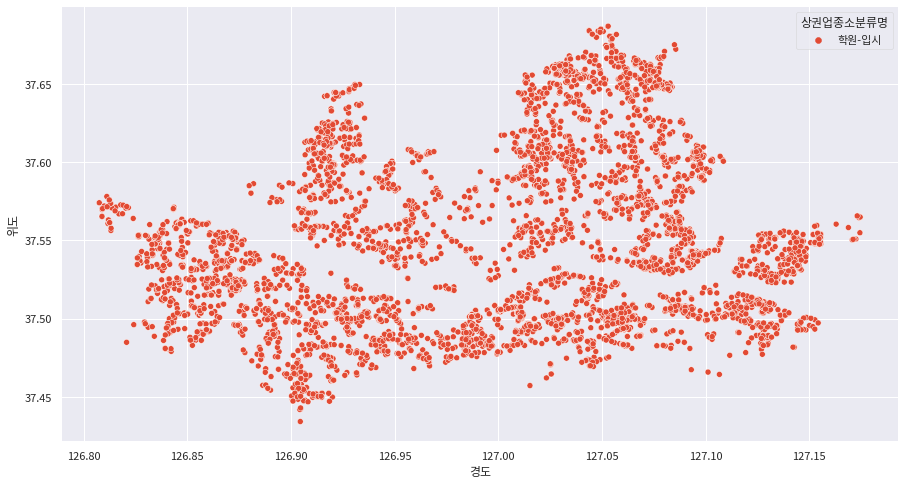

In [21]:
# 학원-입시 데이터
sns.scatterplot(data=df_seoul_academy_selected[df_seoul_academy_selected["상권업종소분류명"]=="학원-입시"], x="경도", y="위도", hue="상권업종소분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

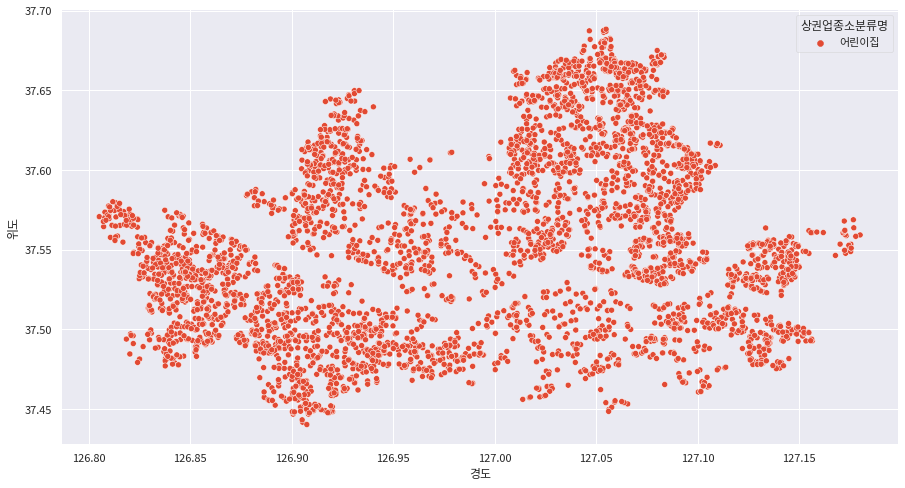

In [22]:
# 어린이집 데이터
sns.scatterplot(data=df_seoul_academy_selected[df_seoul_academy_selected["상권업종소분류명"]=="어린이집"], x="경도", y="위도", hue="상권업종소분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

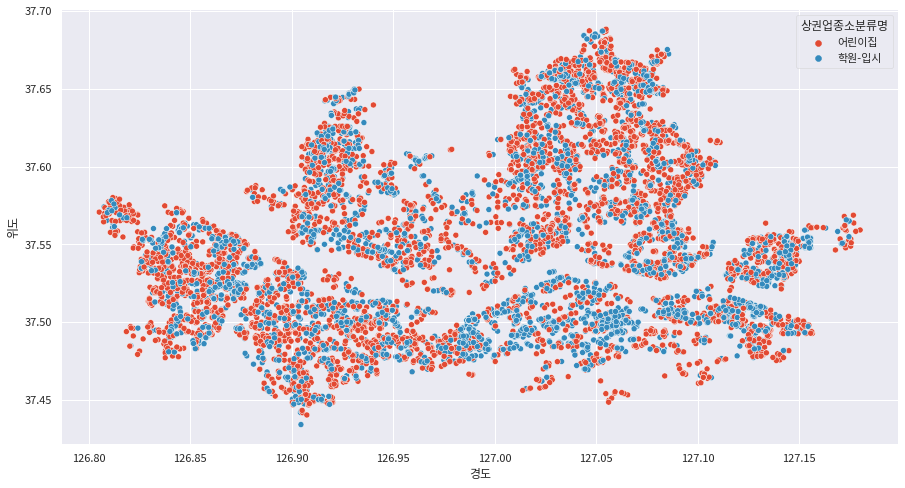

In [25]:
# 어린이집과 학원-입시 비교
sns.scatterplot(data=df_seoul_academy_selected[df_seoul_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])], x="경도", y="위도", hue="상권업종소분류명")

In [7]:
import folium

In [26]:
df_m = df_seoul_academy_selected[df_seoul_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])]
seoul_long = 126.9780
seoul_lat = 37.5665

print(df_m.shape)

# 10000개중에 1000개만 가져옴
df_m = df_m.sample(1000)
print(df_m.shape)

df_m.iloc[0]

(11904, 39)
(1000, 39)


상가업소번호                        27726520
상호명                            꿈동이어린이집
지점명                                NaN
상권업종대분류코드                            R
상권업종대분류명                         학문/교육
상권업종중분류코드                          R08
상권업종중분류명                          유아교육
상권업종소분류코드                       R08A02
상권업종소분류명                          어린이집
표준산업분류코드                        Q87210
표준산업분류명                       보육시설 운영업
시도코드                                11
시도명                              서울특별시
시군구코드                            11380
시군구명                               은평구
행정동코드                       1138063100
행정동명                              신사1동
법정동코드                       1138010900
법정동명                               신사동
지번코드               1138010900200340025
대지구분코드                               1
대지구분명                               대지
지번본번지                               34
지번부번지                             25.0
지번주소               서울특별시 은평구 신사동 34-25
도로명코드                    

In [47]:
# 위도 / 경도
m = folium.Map(location=[37.5665, 126.9780], zoom_start=10, tiles="Stamen Toner")

folium.Marker([37.595027,126.913769],
             tooltip="꿈동이어린이집").add_to(m)
m

In [30]:
m.save('index.html')

In [33]:
df_m.loc[331045, "상호명"]

'꿈동이어린이집'

In [55]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12, tiles="Stamen Toner")

for i in df_m.index[:100]:
    tooltip = df_m.loc[i, "상호명"] + "-" + df_m.loc[i, "도로명주소"]
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    
    folium.CircleMarker([lat,long], radius=3,color="red",
             tooltip=tooltip).add_to(m)

m

# seaborn 옵션

## 색깔 옵션

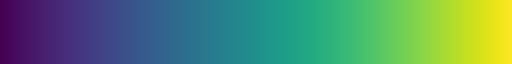

In [113]:
sns.color_palette("viridis", as_cmap=True)

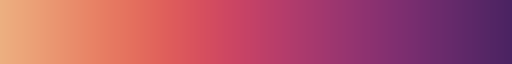

In [114]:
sns.color_palette("flare", as_cmap=True)

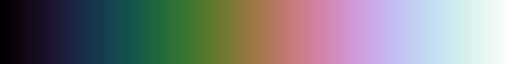

In [115]:
sns.color_palette("cubehelix", as_cmap=True)

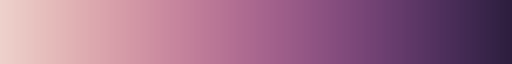

In [116]:
sns.cubehelix_palette(as_cmap=True)

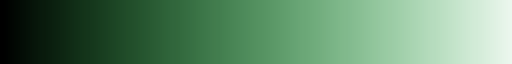

In [117]:
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

### 크기 옵션

In [118]:
# 옵션
sns.set(rc = {"figure.figsize" : (15,8)})
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rc("font", family="Noto Sans KR") # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정